In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

# Watson Distribution Mixture Model

In this notebook I demonstrate how to fit a 2 componenent (axis-aligned) mixture model.  

First, let's sample from two watson distributions to build a test sample.

In [24]:
from watson_dist import DimrothWatson

shape_params = [-5, 5]
mixing_params = [0.4,0.6]
N = 10000 # number of samples

rv = DimrothWatson()
x1 = rv.rvs(k=shape_params[0], size=int(N*mixing_params[0]))
x2 = rv.rvs(k=shape_params[1], size=int(N*mixing_params[1]))

x = np.hstack((x1,x2))

We can then plot the distribuiton of $\cos(\theta)$ for the sample.

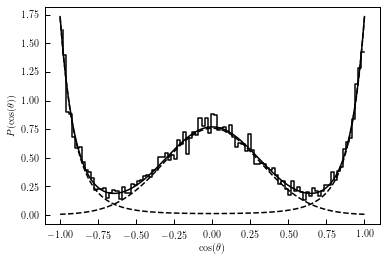

In [39]:
bins = np.linspace(-1,1,100)
counts1 = np.histogram(x1, bins=bins)[0]
counts2 = np.histogram(x2, bins=bins)[0]
counts = counts1+ counts2
p = 1.0*counts/np.sum(counts)/np.diff(bins)

x_sample = np.linspace(-1,1,1000)
p1 = mixing_params[0]*rv.pdf(x_sample, shape_params[0])
p2 = mixing_params[1]*rv.pdf(x_sample, shape_params[1])

plt.figure()
plt.step(bins[1:], p, color='black')
plt.plot(x_sample, p1, '--', color='black')
plt.plot(x_sample, p2, '--', color='black')
plt.plot(x_sample, p1+p2, '-', color='black')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$P(\cos(\theta))$')
plt.show()

Now, we can fit a 2 component mixture model to this test data.  We should get out a similar set of parameters out as we put in.

In [40]:
from watson_dist.watson_dist.mixture_model import DimrothWatsonMixture

In [41]:
mixture_model = DimrothWatsonMixture(n_components=2)
mixture_model.set_params(k=[-1, 1], w=[0.5, 0.5])

[[0.5, -1], [0.5, 1]]

In [42]:
params = mixture_model.fit(x)
print(params)

[[0.4301615331015319, -4.319778595343351], [0.5698384668984682, 5.898316629491479]]


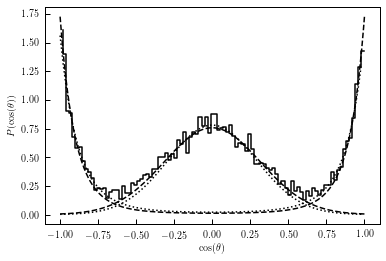

In [45]:
plt.figure()
plt.step(bins[1:], p, color='black')
plt.plot(x_sample, p1, '--', color='black')
plt.plot(x_sample, p2, '--', color='black')
plt.plot(bins[:-1], params[0][0]*rv.pdf(bins[:-1], params[0][1]), ':', color='black')
plt.plot(bins[:-1], params[1][0]*rv.pdf(bins[:-1], params[1][1]), ':', color='black')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$P(\cos(\theta))$')
plt.show()